## Loan Eligibility

@Author: Berk Mehmet Gürlek

[Dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/loan-train.csv')

### **2. Explore the Dataset**

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Convert Target Variable to 0-1**

In [4]:
data['Loan_Status'] = data.apply(lambda x: 1 if x['Loan_Status'] == 'Y' else 0, axis=1)

In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Handle Missing Values by Imputation**

In [9]:
for column in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    data[column].fillna(data[column].mean(), inplace=True)

# For categorical columns, impute with the mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [10]:
# Drop Loan_ID which will not be used in model training
data = data.drop(columns=['Loan_ID'])

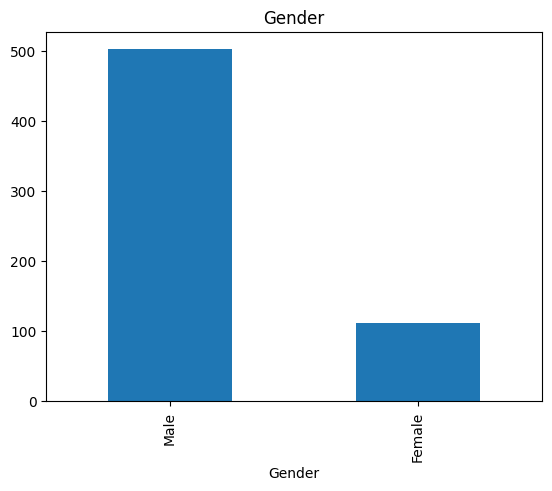

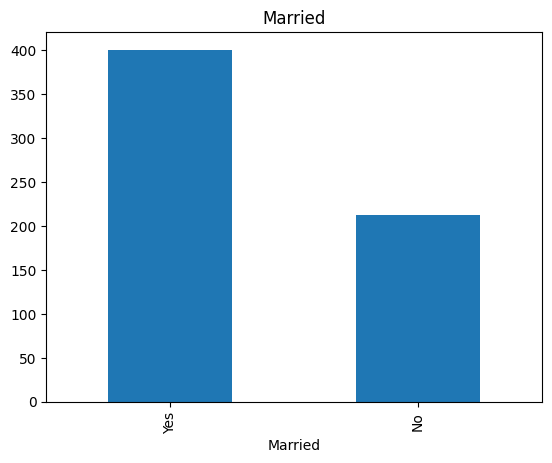

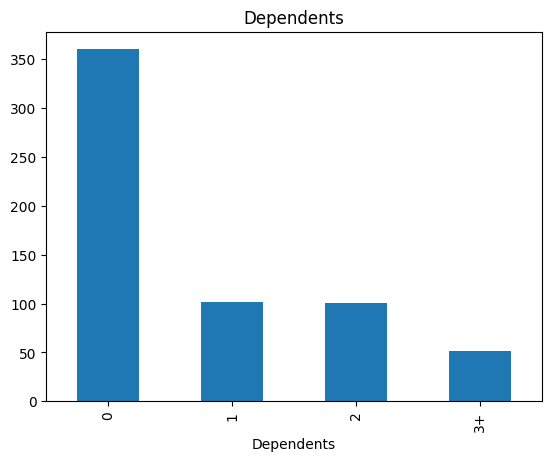

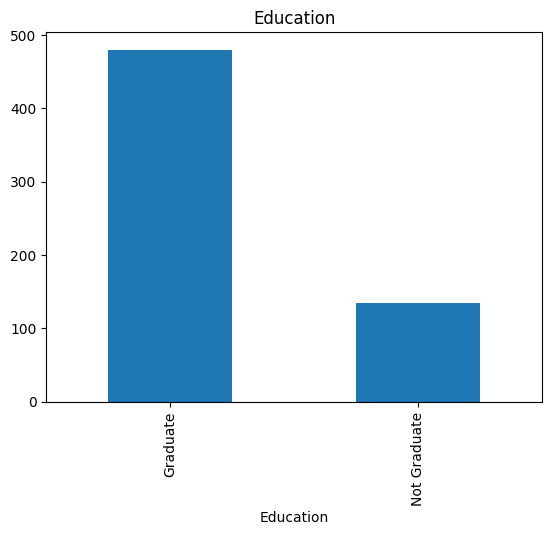

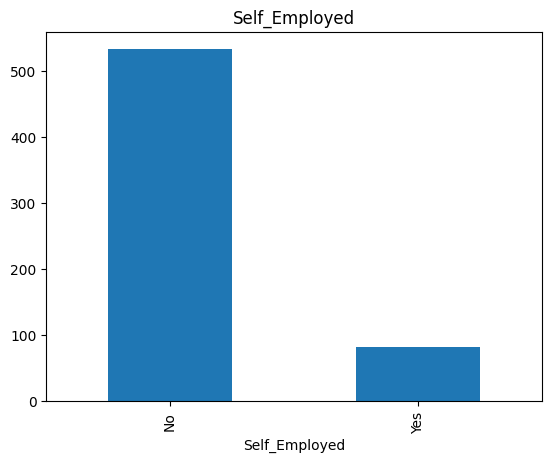

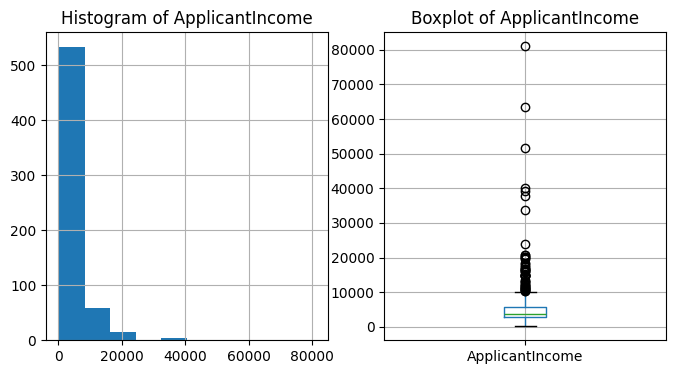

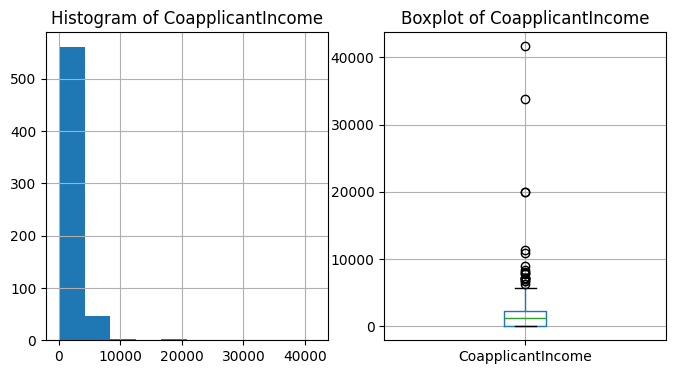

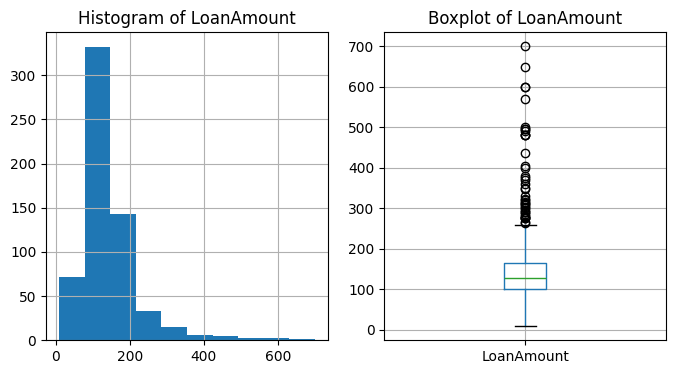

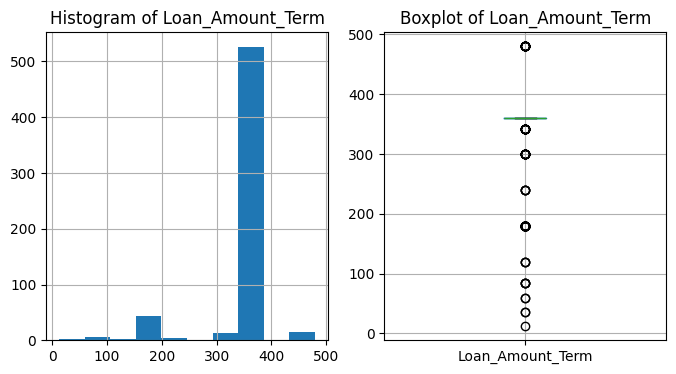

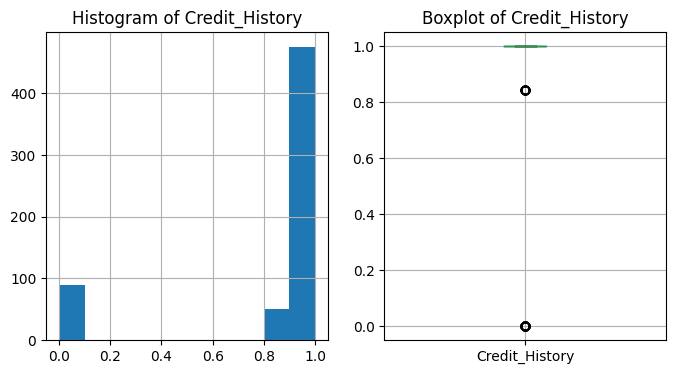

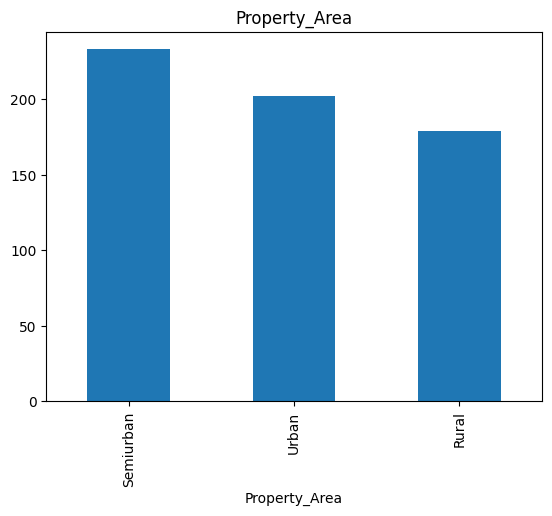

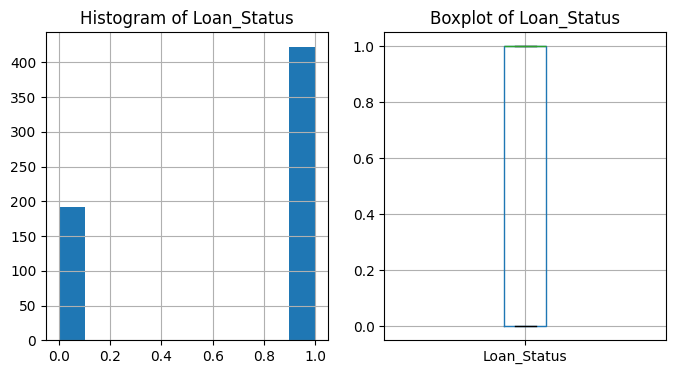

In [11]:
# Univariate analysis
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        data[col].hist()
        plt.title(f'Histogram of {col}')
        plt.subplot(1, 2, 2)
        data.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

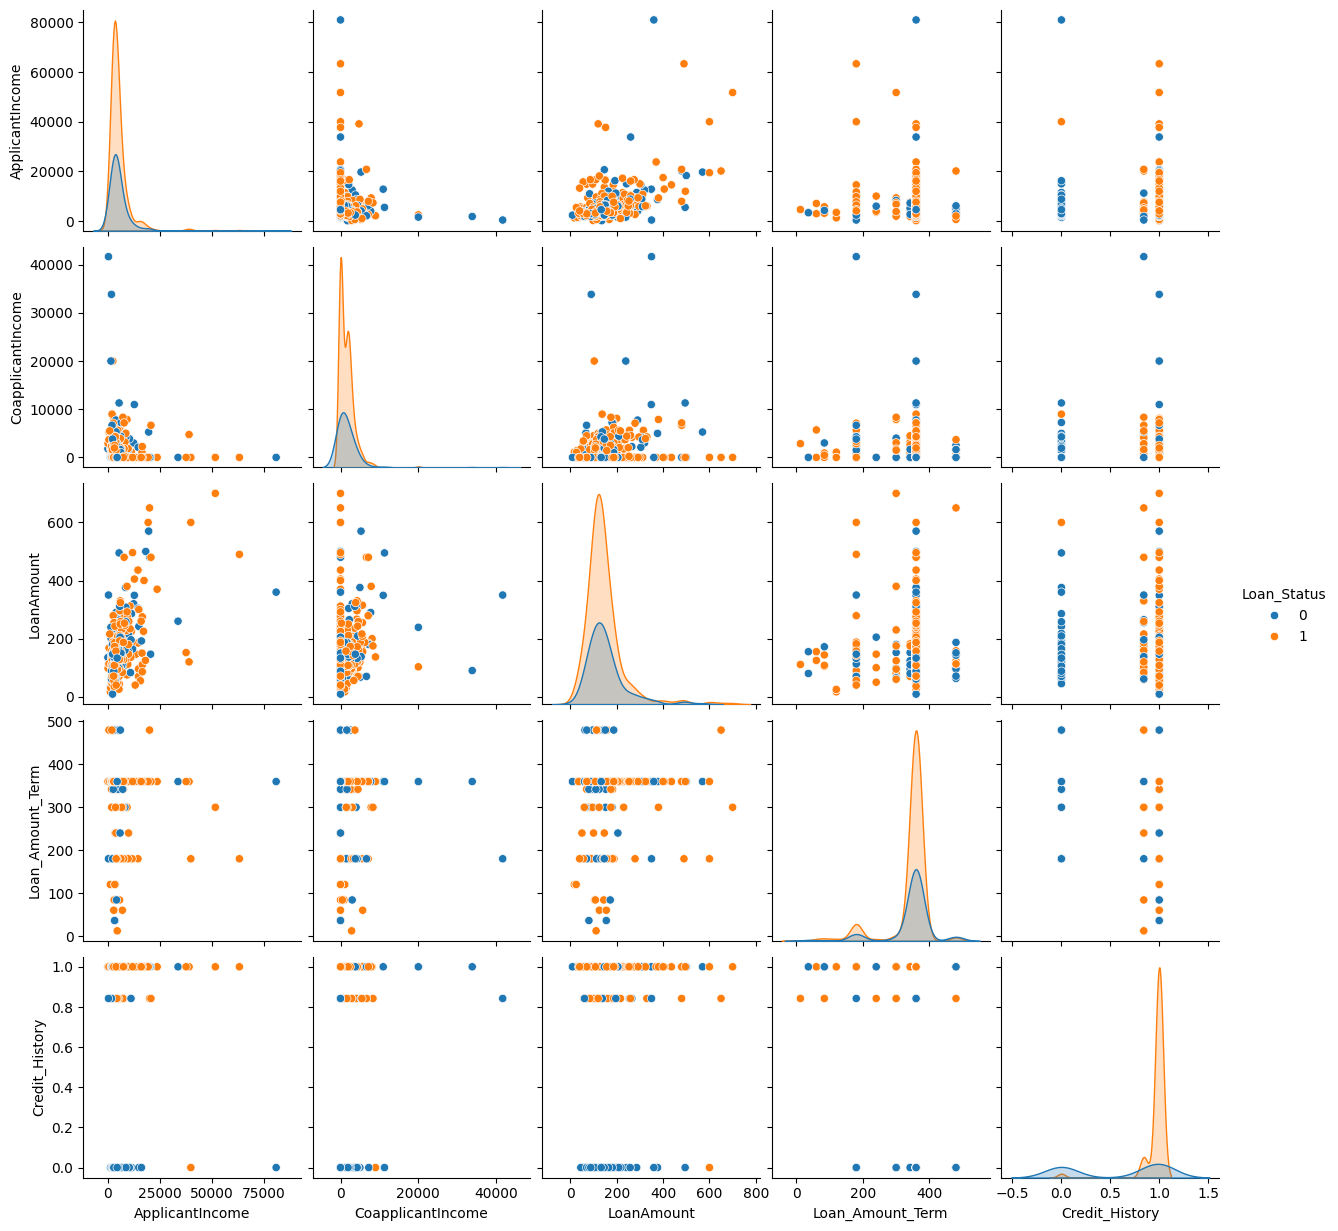

In [12]:
# 4. Bivariate Analysis
sns.pairplot(data, hue='Loan_Status')
plt.show()

**Handling Categorical Values**

In [13]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].nunique())

Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3


In [14]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

**There exists maximum of 4 unique values for categorical columns. Thus, we can proceed with one-hot encoder which is suitable for nominal variables**

In [15]:
for col in X.columns:
    if X[col].dtype == 'object':
        X = pd.get_dummies(X, columns=[col], drop_first=True) 

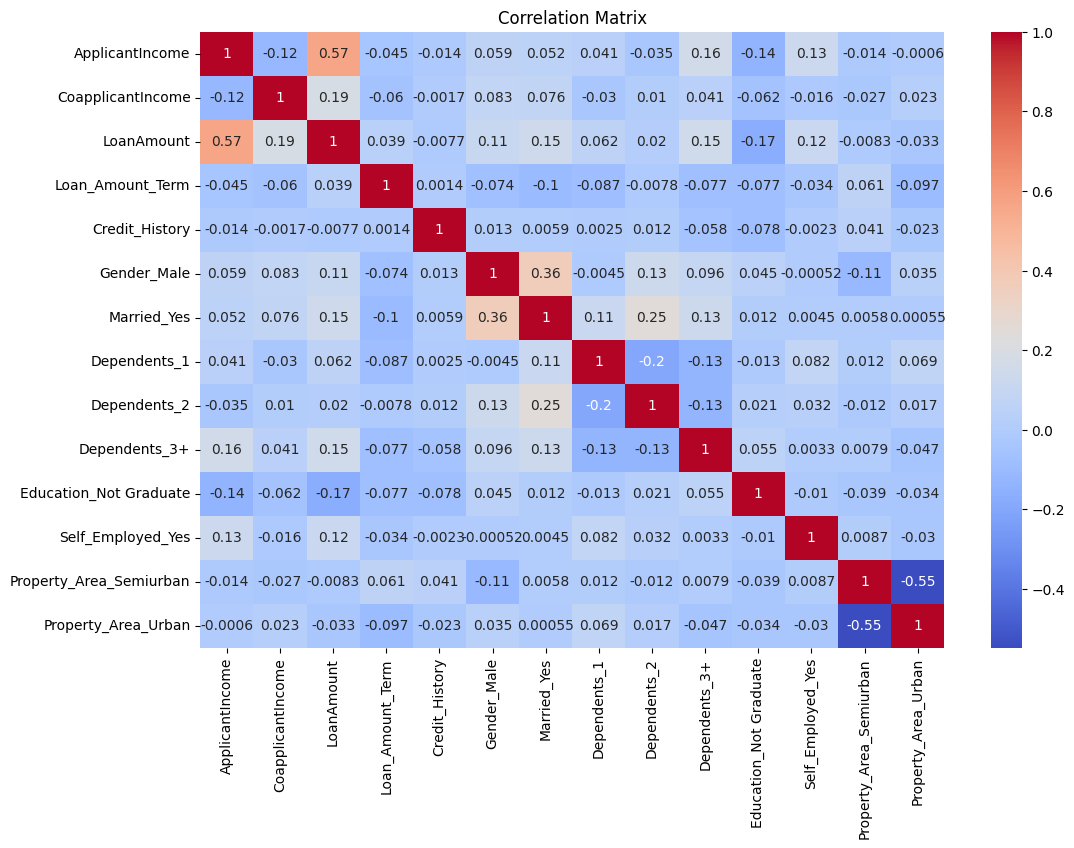

In [16]:
# Correlation analysis
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Strong Positive Correlation: A strong positive correlation (close to 1) suggests that as one variable increases, the other variable also increases. In this matrix, there's a notably high correlation between ApplicantIncome and LoanAmount, which makes sense as higher incomes might allow individuals to request larger loans.


- Negative Correlation: A negative correlation (close to -1) indicates that as one variable increases, the other decreases. Here, Property_Area_Urban and Property_Area_Semiurban are negatively correlated, which could be due to the fact that they are probably mutually exclusive categories.


- No Correlation: Correlations close to 0 suggest no linear relationship between the variables. For example, Credit_History appears to have little to no linear correlation with Property_Area_Semiurban and Property_Area_Urban.


- Correlations with Credit_History: Credit_History has a moderate positive correlation with Married_Yes and Gender_Male, which could suggest some patterns in credit history across different genders and marital statuses, but these correlations are not very strong.


- Other Notable Correlations: Married_Yes is moderately correlated with Dependents_2, which may imply that married applicants are more likely to have two dependents.


- Education and Self-Employment: Both Education_Not Graduate and Self_Employed_Yes have a slight positive correlation with ApplicantIncome, which might indicate that individuals who are not graduates or who are self-employed have a tendency towards higher incomes in this dataset, though these correlations are quite weak.


- Property Area: There is a moderate negative correlation between Property_Area_Semiurban and Property_Area_Urban, indicating that these are distinct categories and likely inversely related within the data - as expected since a property cannot be in both a semi-urban and an urban area.

### **3. Data Preparation**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Selection**

In [18]:
# Using Random Forest to gain an insight on feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

clf.fit(X_train, y_train)

sfm = SelectFromModel(clf, threshold=0.15)

sfm.fit(X_train, y_train)

feature_importances = clf.feature_importances_

In [19]:
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_sorted = features.sort_values('Importance', ascending=False)

median_importance = features['Importance'].median()
sfm = SelectFromModel(clf, threshold=median_importance)
sfm.fit(X_train, y_train)

important_features = []
for feature_list_index in sfm.get_support(indices=True):
    important_features.append(X.columns[feature_list_index])

In [20]:
features_sorted

,Feature,Importance
4,Credit_History,0.264838
0,ApplicantIncome,0.196097
2,LoanAmount,0.182280
1,CoapplicantIncome,0.114183
3,Loan_Amount_Term,0.045024
6,Married_Yes,0.026902
12,Property_Area_Semiurban,0.026198
13,Property_Area_Urban,0.025108
10,Education_Not Graduate,0.022981
11,Self_Employed_Yes,0.022253


In [21]:
important_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Married_Yes',
 'Property_Area_Semiurban']

In [22]:
X_selected = X[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Married_Yes',
 'Property_Area_Semiurban']]

In [23]:
selected_features = X_train.columns[sfm.get_support(indices=True)]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### **4. Model Building**

In [24]:
logistic_regression_model = LogisticRegression(random_state=0, max_iter=1000)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
svm_model = SVC(random_state=0)

**Logistic Regression**

In [25]:
logistic_regression_model.fit(X_train_selected, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_selected)
accuracy_score(y_test, logistic_regression_predictions)

0.8373983739837398

In [26]:
confusion_matrix(y_test, logistic_regression_predictions)

array([[15, 18],
       [ 2, 88]])

In [27]:
print(classification_report(y_test, logistic_regression_predictions))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



**Random Forest Classifier**

In [28]:
random_forest_model.fit(X_train_selected, y_train)
random_forest_predictions = random_forest_model.predict(X_test_selected)
accuracy_score(y_test, random_forest_predictions)

0.8211382113821138

In [29]:
confusion_matrix(y_test, random_forest_predictions)

array([[19, 14],
       [ 8, 82]])

In [30]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.85      0.91      0.88        90

    accuracy                           0.82       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.81      0.82      0.82       123



**SVC**

In [31]:
svm_model.fit(X_train_selected, y_train)
svm_predictions = svm_model.predict(X_test_selected)
accuracy_score(y_test, svm_predictions)

0.7317073170731707

In [32]:
confusion_matrix(y_test, svm_predictions)

array([[ 0, 33],
       [ 0, 90]])

In [33]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



### **Best Model Evaluation**

In [34]:
cv_accuracy = cross_val_score(logistic_regression_model, X_train_selected, y_train, cv=5, scoring='accuracy').mean()

y_scores = cross_val_predict(logistic_regression_model, X_train_selected, y_train, cv=5, method='decision_function')
roc_auc = roc_auc_score(y_train, y_scores)

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [35]:
cv_accuracy

0.8044320758606472

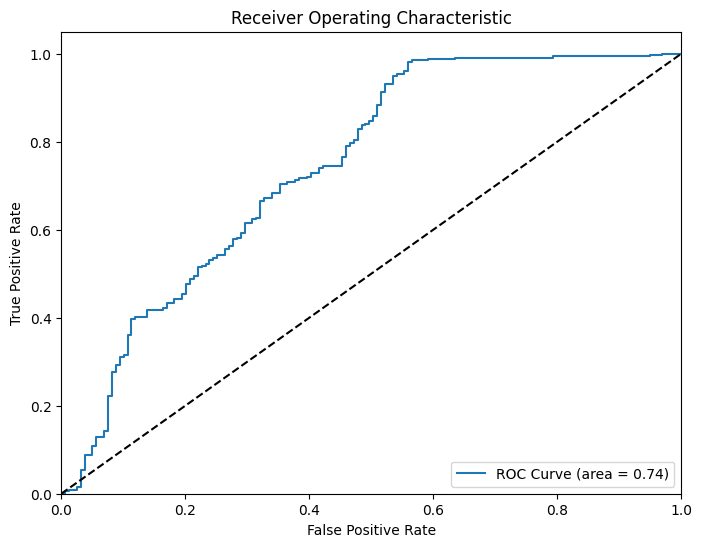

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

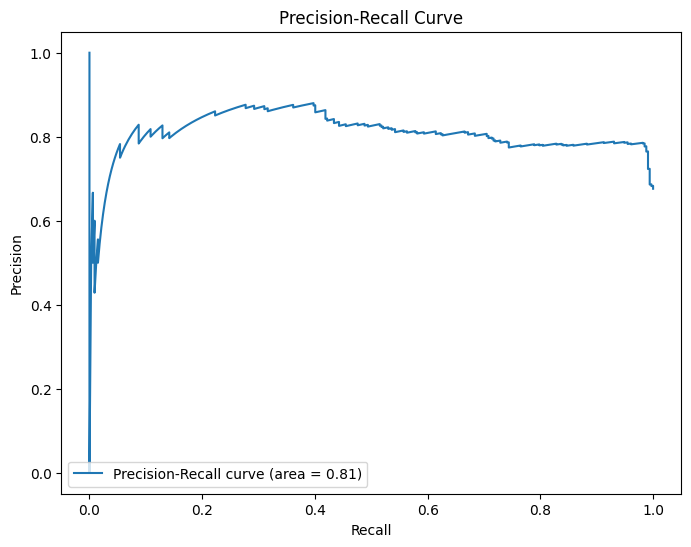

In [37]:
precision, recall, _ = precision_recall_curve(y_train, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [38]:
test_df = pd.read_csv('data/loan-test.csv')

In [39]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
test_df = test_df.drop(columns=['Loan_ID'])

In [41]:
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df = pd.get_dummies(test_df, columns=[col], drop_first=True) 

In [42]:
test_df_selected = test_df[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Married_Yes',
 'Property_Area_Semiurban']]

In [43]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,True,True,False,False,False,False,False,False,True
1,3076,1500,126.0,360.0,1.0,True,True,True,False,False,False,False,False,True
2,5000,1800,208.0,360.0,1.0,True,True,False,True,False,False,False,False,True
3,2340,2546,100.0,360.0,NaN,True,True,False,True,False,False,False,False,True
4,3276,0,78.0,360.0,1.0,True,False,False,False,False,True,False,False,True


In [44]:
preds = random_forest_model.predict(test_df_selected)

In [45]:
test_df['Loan_Status'] = preds

In [46]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0,110.0,360.0,1.0,True,True,False,False,False,False,False,False,True,1
1,3076,1500,126.0,360.0,1.0,True,True,True,False,False,False,False,False,True,1
2,5000,1800,208.0,360.0,1.0,True,True,False,True,False,False,False,False,True,1
3,2340,2546,100.0,360.0,NaN,True,True,False,True,False,False,False,False,True,1
4,3276,0,78.0,360.0,1.0,True,False,False,False,False,True,False,False,True,1
